In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
matrix = pd.read_csv('../../Pipeline/MultiClass/Genus/matrix.txt',sep = '\s+',header=None)

In [6]:
df2 = matrix.div(matrix.sum(axis=1),axis=0)

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


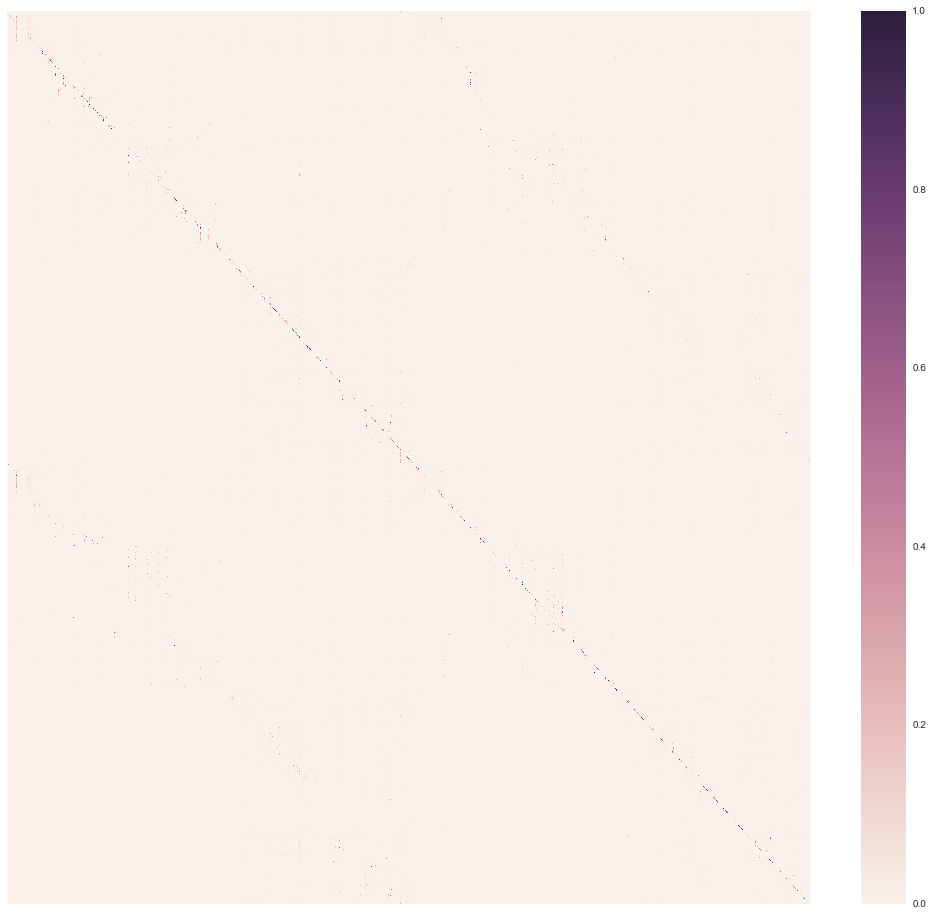

In [7]:
fig, ax = plt.subplots(figsize= (18,16))
sns.heatmap(df2,xticklabels=False,yticklabels=False)

In [8]:
precision = pd.read_csv("../../Pipeline/MultiClass/Genus/precision_by_label.txt",sep=" = ",names=['genus_id','precision'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [9]:
genus = pd.read_csv("../../Pipeline/MultiClass/all.vect.genus.index", sep=" ",names = ['genus','real_tax_id'])

In [10]:
new_genus = precision.join(genus)

In [11]:
group = pd.read_csv("../../Pipeline/MultiClass/genus_group.list", sep=" ",names = ['group'],index_col=0)

In [12]:
new_precision = new_genus.join(group, on="real_tax_id")

In [13]:
precision_group = new_precision.loc[:,['precision','group']]

In [14]:
precision_group.groupby(['group']).count()

,precision
group,
arch,56
bact,638
euk,938
virus,137


In [15]:
precision_group.groupby(['group']).describe()

precision
group                  
arch  count   56.000000
      mean     0.353317
      std      0.262962
      min      0.000000
      25%      0.109531
      50%      0.335586
      75%      0.557632
      max      0.901000
bact  count  638.000000
      mean     0.301971
      std      0.276029
      min      0.000000
      25%      0.066496
      50%      0.227592
      75%      0.474408
      max      0.999664
euk   count  938.000000
      mean     0.236336
      std      0.327051
      min      0.000000
      25%      0.000000
      50%      0.025275
      75%      0.401746
      max      1.000000
virus count  137.000000
      mean     0.639820
      std      0.335539
      min      0.000000
      25%      0.419532
      50%      0.727693
      75%      0.935714
      max      1.000000

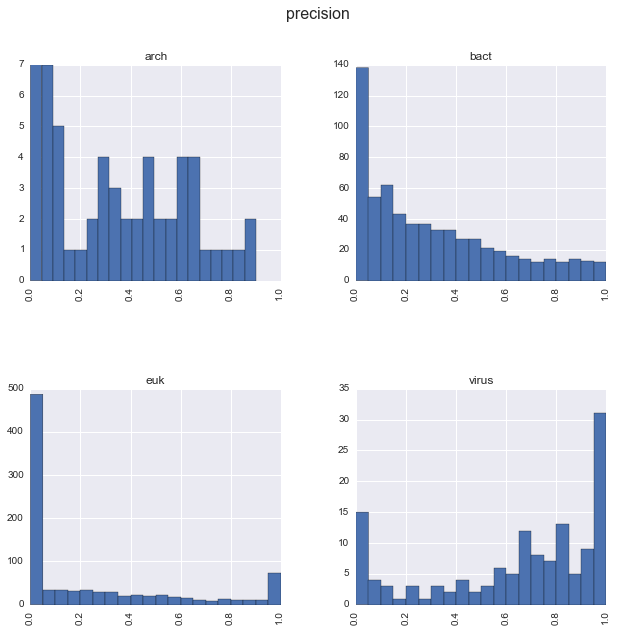

In [16]:
precision_group.hist(column='precision',by='group',bins=20,figsize=(10, 10))
plt.suptitle("precision",fontsize=16)

In [17]:
recall = pd.read_csv("../../Pipeline/MultiClass/Genus/recall_by_label.txt",sep=" = ",names=['family_id','recall'])
new_family_recall = recall.join(genus)
new_recall = new_family_recall.join(group, on="real_tax_id")
recall_group = new_recall.loc[:,['recall','group']]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


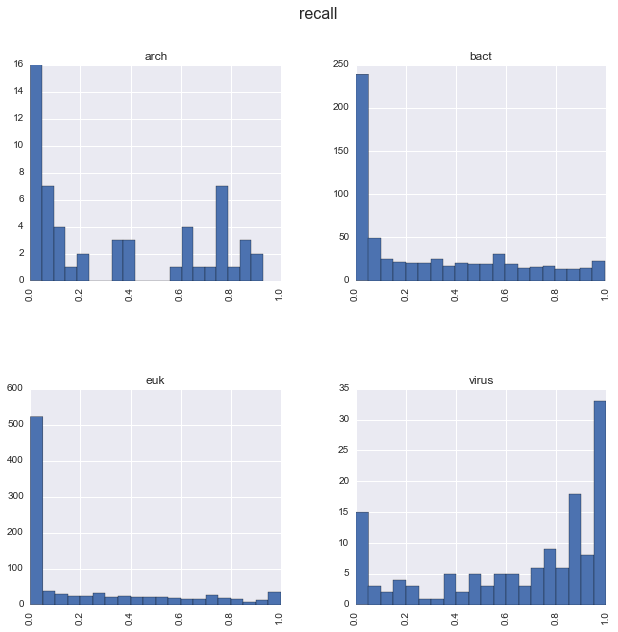

In [18]:
recall_group.hist(column='recall',by='group',bins=20,figsize=(10, 10))
plt.suptitle("recall",fontsize=16)

In [19]:
f1 = pd.read_csv("../../Pipeline/MultiClass/Genus/f1_by_label.txt",sep=" = ",names=['family_id','f1'])
new_family_f1 = f1.join(genus)
new_f1 = new_family_f1.join(group, on="real_tax_id")
f1_group = new_f1.loc[:,['f1','group']]

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


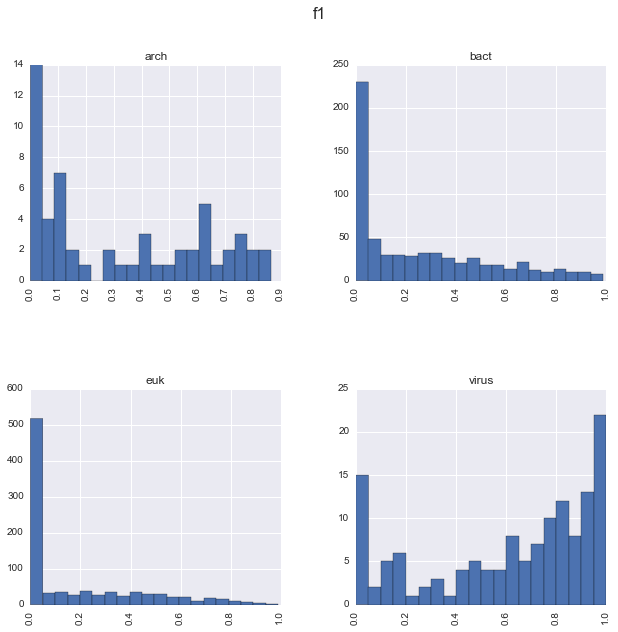

In [20]:
f1_group.hist(column='f1',by='group',bins=20,figsize=(10, 10))
plt.suptitle("f1",fontsize=16)